# **Transformada 2D de una imagen**
## *Procesamiento de Imagen y Señal*

In [1]:
import sys
import os

import math

##

import warnings
warnings.filterwarnings("error")

##

import numpy as np
from numpy.fft import fft2, fftshift, ifft2

import matplotlib.pyplot as plt

from scipy import signal, fftpack, ndimage

from scipy.ndimage import convolve

from skimage import io, color, transform, img_as_ubyte, img_as_float, data, exposure, filters

from PIL import Image

In [2]:
sys.path.append(os.getcwd())

# Funciones auxiliares
path = "code/"

# Add the directory containing your module to the Python path (wants absolute paths)
sys.path.append(os.path.abspath(path))


---

## **Ejemplo: Imagen periódica en la dirección horizontal**

Generamos una imagen periódica de tamaño $600 \times 300$ en el espacio $[0,1) \times [0, 1)$ con una frecuencia de la onda sinusoidal de $10.5$ en la dirección horizontal (en vertical, la imagen es constante). 

Esta imagen viene dada por la función $A=f(X,Y)$ y, por tanto, un corte por un plano paralelo al plano $OXZ$ de dicha superficie sería una función periódica de frecuencia $f=10.5$ Hz y de periodo $T=\frac{1}{f}$.

Calculamos la transformada DFT centrada en el origen y mostramos el espectro de potencia. Además, cortamos la superficie representada por un plano vertical que contiene el eje $OX$.

In [3]:
# Crea una malla de dimensiones w x h en el espacio [0,1)x[0,1)
w, h = 600, 300
x = np.linspace( 0, 2*w/(2*w +1), 2*w+1)     # columnas (Anchura)
y = np.linspace( 0, 2*h/(2*h +1), 2*h+1)     # filas    (Altura)
[X,Y] = np.meshgrid(x,y)

Dimensiones de la imagen: H = 601 , W = 1201


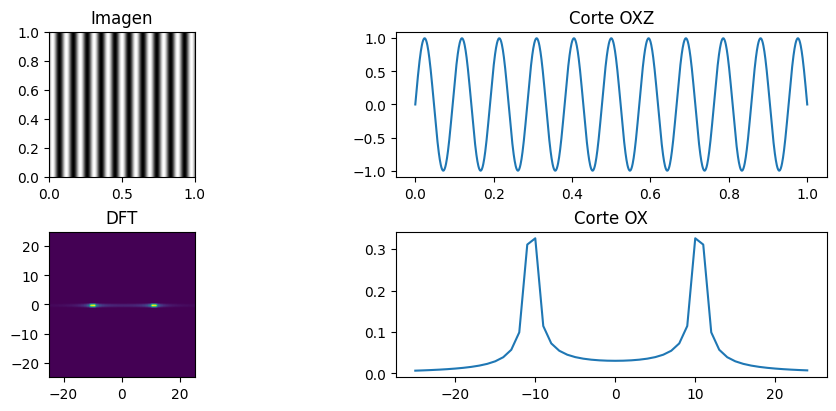

In [4]:
# Generacion de la imagen periodica A = f(X,Y)

# Onda sinusoidal en la direccion horizontal (frecuencia = 10.5 Hz)
fh = 10.5
A_h = np.sin(2*np.pi*fh*X)

H, W = np.shape(A_h)   # Dimensiones de la imagen A
print('Dimensiones de la imagen: H =', H, ', W =', W);

# DFT
F_h = fft2(A_h)/(W*H)                          
F_h = fftshift(F_h)
P_h = np.abs(F_h)

r = 25 # Para la visualizacion de la DFT
xx = np.linspace(0, 1, 1200)

fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,4), layout="compressed")
axs[0,0].imshow(A_h, extent=[0,1,0,1], cmap ='gray')
axs[0,0].set_title('Imagen')
axs[0,1].plot(xx, np.sin(2*np.pi*fh*xx))
axs[0,1].set_title('Corte OXZ')
#axs[1,0].imshow(P, extent = [-w,w,-h,h])
# Frecuencias cercanas a cero (r = 25)
axs[1,0].imshow(P_h[h-r:h+r,w-r:w+r], extent=[-r,r,-r,r])
axs[1,0].set_title('DFT')
axs[1,1].plot(range(-r,r), P_h[h,w-r:w+r])
axs[1,1].set_title('Corte OX')

plt.show()

<hr style="border: 1px solid pink" />

## **Ejemplo: Imagen periódica en la dirección horizontal y vertical**

Ahora crearemos otra imagen con una frecuencia horizontal y otra vertical.
Cortaremos esta superficie por el plano $y=0.5$ y obtendremos la curva. Y haremos lo mismo, al cortar la superficie por el plano $x=0.5$
Finalmente, cortamos la superficie con un plano perpendicular al plano $OXY$ que contiene al eje $OX$, y con otro plano que contiene a $OY$.

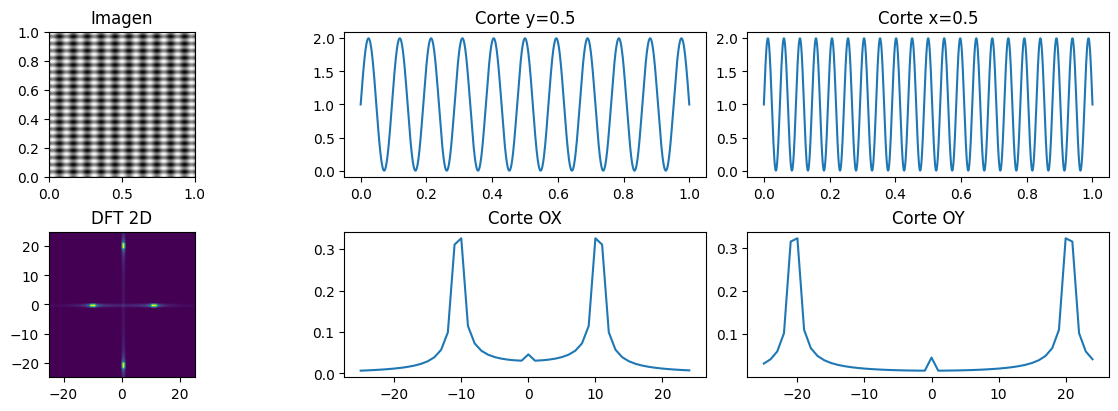

In [5]:
# Generacion de la imagen periodica A = f(X,Y)

# Onda sinusoidal en la direccion horizontal (frecuencia = 10.5 Hz) y onda sinusoidal en la direccion vertical (frecuencia = 20.5 Hz)
fv = 20.5
A_h_v = np.sin(fh*2*np.pi*X) + np.sin(fv*2*np.pi*Y)

# DFT
F_h_v = fft2(A_h_v)/(W*H)                          
F_h_v = fftshift(F_h_v)
P_h_v = np.abs(F_h_v)

# y = 0.5
xx_y = np.linspace(0, 1, 1200)
yy_y = 0.5*np.ones(1200)

# x = 0.5
yy_x = np.linspace(0,1,1200)
xx_x = 0.5*np.ones(1200)

fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(15,4), layout="compressed")
axs[0,0].imshow(A_h_v, extent=[0,1,0,1], cmap ='gray')
axs[0,0].set_title('Imagen')
axs[0,1].plot(xx_y,np.sin(fh*2*np.pi*xx_y) + np.sin(fv*2*np.pi*yy_y))
axs[0,1].set_title('Corte y=0.5')
axs[0,2].plot(yy_x,np.sin(fh*2*np.pi*xx_x) + np.sin(fv*2*np.pi*yy_x))
axs[0,2].set_title('Corte x=0.5')
#axs[1,0].imshow(P_h_v, extent = [-w,w,-h,h])
# Frecuencias cercanas a cero (r = 25)
axs[1,0].imshow(P_h_v[h-r:h+r,w-r:w+r], extent=[-r,r,-r,r])
axs[1,0].set_title('DFT 2D')
axs[1,1].plot(range(-r,r), P_h_v[h,w-r:w+r])
axs[1,1].set_title('Corte OX')
axs[1,2].plot(range(-r,r), P_h_v[h-r:h+r,w])
axs[1,2].set_title('Corte OY')

plt.show()

<hr style="border: 1px solid pink" />

## **Ejemplo: Imagen periódica en la dirección horizontal y vertical conjuntamente**

Finalmente, creamos otra imagen combinando ambas frecuencias (horizontal y vertical) conjuntamente.

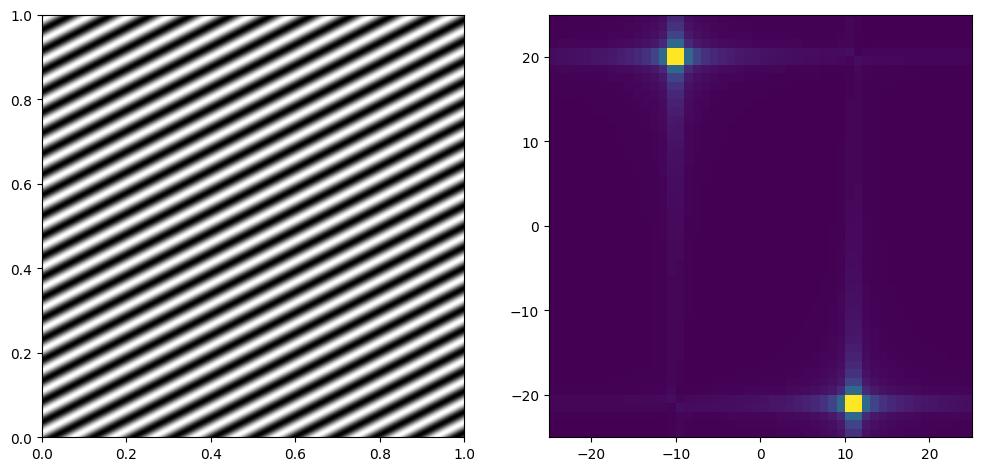

In [6]:
A_hv = np.sin(fh*2*np.pi*X + fv*2*np.pi*Y)

F_hv = fft2(A_hv)/(W*H)                          
F_hv = fftshift(F_hv)
P_hv = np.abs(F_hv)

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
axs[0].imshow(A_hv, cmap = 'gray',extent=[0,1,0,1])
axs[1].imshow(P_hv[h-r:h+r,w-r:w+r], extent=[-r,r,-r,r])

Si rotamos la imagen anterior, como hay una región grande de valor constante (negro), el valor del espectro de potencia en el origen es alto, haciendo que no resalten los valores de las frecuencias importantes. Eliminamos este efecto restando el valor medio de la imagen.

Posteriormente, calculamos las coordenadas de los coeficientes de más alta frecuencia y el ángulo. Y finalmente, rotamos y recuperamos la imagen original.

alpha = 65.1189251525509


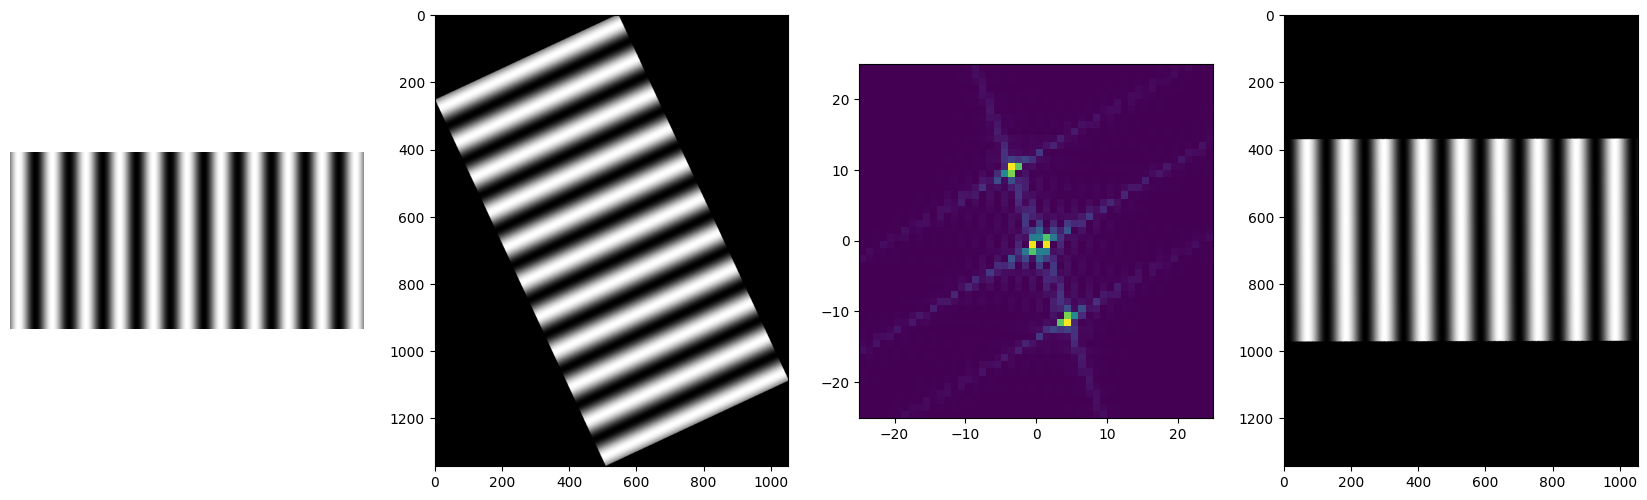

In [7]:
r = 25
min_A = A_h.min()
max_A = A_h.max()

Ar = (A_h - min_A)/(max_A - min_A)         # normalizamos a [0,1]
I = Image.fromarray(np.uint8(Ar*255))       # convertimos a imagen PIL

rot_angulo = -65
B = I.rotate(rot_angulo, expand = True)     # rotamos sin recortar

B4 = np.asarray(B, dtype=np.float32)
sY,sX = np.shape(B4)

F4 = fft2(B4)/(sX*sY)
F4 = fftshift(F4)
P4 = np.abs(F4)

cX = int(np.fix(sX/2))                    # punto medio de la imagen
cY = int(np.fix(sY/2))

# Restamos el valor medio de la imagen
F4 = fft2(B4-B4.mean())/(sX*sY)
F4 = fftshift(F4)
P4 = np.abs(F4)

# Coordenadas de los coeficientes de mas alta frecuencia
indices = np.where(P4 == np.max(P4))
maxY = (indices[0][0]-cY)/sY 
maxX = (indices[1][0]-cX)/sX 

# Angulo
alpha=np.arctan(maxY/maxX)*180/np.pi

print("alpha = "+str(alpha))

C = B.rotate(alpha)

fig, axs = plt.subplots(ncols=4, figsize=(21, 6))
axs[0].imshow(Ar, cmap = 'gray')
axs[0].set_axis_off()
axs[1].imshow(B, cmap = 'gray')
axs[2].imshow(P4[cY-r:cY+r,cX-r:cX+r], extent=[-r,r,-r,r])
axs[3].imshow(C, cmap = 'gray');

<hr style="border: 1px solid pink" />

# **Ejemplo: Imagen real**

Vamos a utilizar una imagen real con una frecuencia alta a lo largo del eje horizontal (el máximo relativo se alinea con el eje horizontal). De hecho, es perceptible a simple vista.
Nota: Obsérvese en la transformada el alineamiento de los máximos relativos con el eje horizontal de $log(1+P)$. También puede verse claramente la simetría respecto a ambos ejes.

Además, podemos recuperar una imagen a partir del conjunto de coeficientes $F$ usando la transformada inversa de Fourier. En este caso, vamos a utilizar los coeficientes que superen un umbral $T$ (mayores en módulo).

Para encontrar este valor del umbral podemos utilizar, por ejemplo, el siguiente criterio. Sea $g(T)$ el número de índices en $S_T$. 

$$S_T=\{ 0 \leq m \leq M-1, 0 \leq n \leq N-1 : | F(m,n) | \geq T \}$$

Cuando $T=0$, tenemos $g(0)=MN$ ya que $| F(m,n) |$ es siempre no negativo. Para $T> \max | F(m,n) |$, tenemos $g(T)=0$. Debe tenerse en cuenta que $g$ es una función decreciente que depende de $T$.

Text(0.5, 1.0, 'imagen_reconstruida')

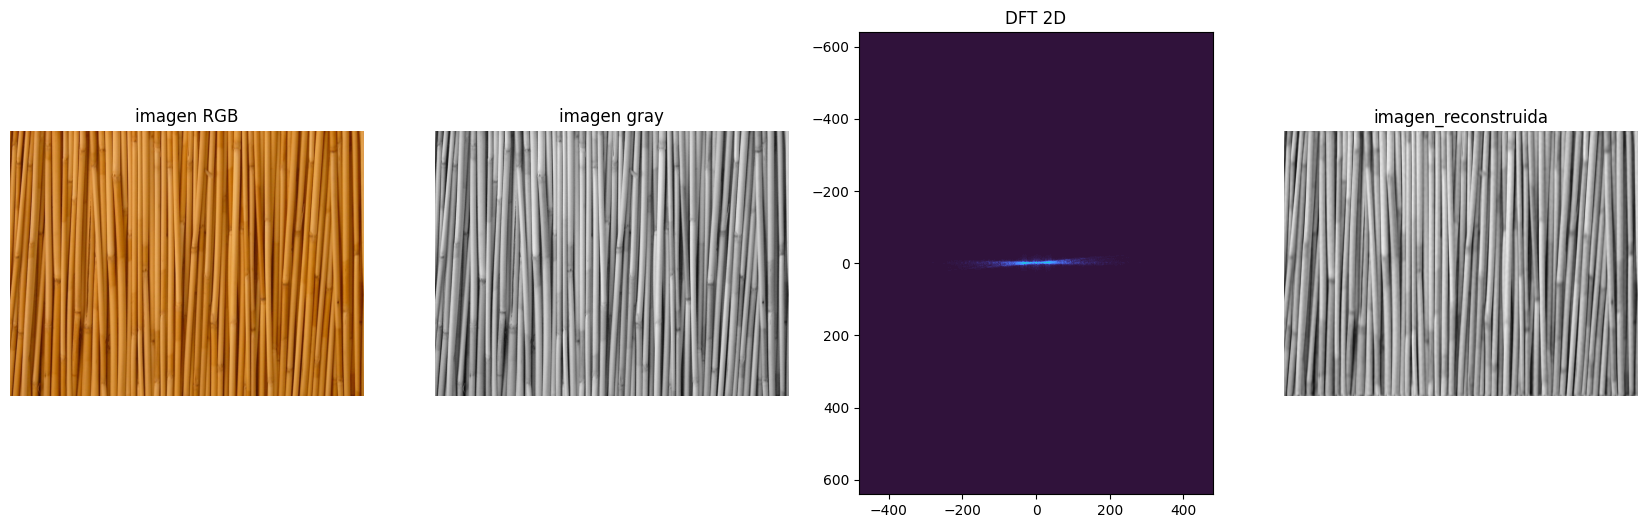

In [8]:
im = io.imread("data_images/canes_RGB.jpg")
B = color.rgb2gray(im)
B = B.astype(np.float64)
M,N = B.shape

F = np.fft.fft2(B) /np.sqrt(M*N)
cF = np.fft.fftshift(F)
cP = np.abs(cF) ** 2

# Reconstruccion de la imagen
T = 0.1
c = F * (np.abs(F) >= T)
fM = np.real(np.fft.ifft2(c))*np.sqrt(M*N)

fig, axs = plt.subplots(ncols=4, figsize=(21, 6))
axs[0].imshow(im)
axs[0].set_axis_off()
axs[0].set_title('imagen RGB')
axs[1].imshow(B, cmap = 'gray')
axs[1].set_axis_off()
axs[1].set_title('imagen gray')
axs[2].imshow(np.log(1 + cP), extent=(-np.floor(M/2), np.floor(M/2), -np.floor(N/2), np.floor(N/2)), aspect='auto', cmap='turbo')
axs[2].invert_yaxis()
axs[2].set_title('DFT 2D')
axs[3].imshow(fM, cmap = 'gray')
axs[3].set_axis_off()
axs[3].set_title('imagen_reconstruida')

In [9]:
# Numero de coeficientes no nulos de la transformada de Fourier
out1 = np.count_nonzero(F)
# Numero de coeficientes a los que hemos aplicado el umbral (para la reconstruccion de la imagen)
out2 = np.count_nonzero(c)
#  Ratio de compresion
out3=out1/out2
print('original: ', out1, ' reconstruida: ', out2, ' ratio de compresion:', out3)

original:  1228800  reconstruida:  23253  ratio de compresion: 52.84479422010063
